<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/Image/ibm-logo.png"
width="500" />
</p>

# **Exploratory Data Analysis for Machine Learning**

**Notebook content**
> **WEEK 1.2** - Retrieving Data, Exploratory Data Analysis and Feature Engineering
> * 1.2.1 - Retrieving Data
> * 1.2.2 - Data Cleaning
> * 1.2.3 - Exploratory Data Analysis (EDA)
> * 1.2.4 - Feature Engineering and Variable Transformation


***
***
# **Week 1.2.1 - Retrieving Data**

Notebook of my notes for the week 1.2.1 of the course [Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

***
***

## **CSV FILES**
***
*Comma-separated* (CSV) files consist of rows of data, separated by commas. 


### **Reading CSV files**

In [ ]:
import pandas as pd

filepath = 'https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/01%20-%20Exploratory%20Data%20Analysis%20for%20Machine%20Learning/Data/iris.csv'

# Import the data
data = pd.read_csv(filepath)

# Print a few rows
data.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

### **Useful Arguments**

**Different delimiters**

<font color='green'># tab-separated file (.tsv)</font>

```
data = pd.read_csv(filepath, sep='\t')
```

<font color='green'># space-separated file</font>


```
data = pd.read_csv(filepath, delim_whitespace=True)
```

**Other arguments**

<font color='green'># Don't use first row for column names</font>


```
data = pd.read_csv(filepath, header=None)
```

<font color='green'># Specify column names)</font>

```
data = pd.read_csv(filepath, names=['Name1', 'Name2'])
```

<font color='green'># Custom missing values</font>


```
data = pd.read_csv(filepath, na_values=['NA', 99])
```







## **JSON FILES**
***
**JavaScript Object Notation (JSON)** files are standard way to store data across platforms.

JSON files are very similar in structure to Python dictionaries.

The Jupyter/iPython (.ipynb files) uses JSON formatting. 

### **Reading JSON finles**

<font color='green'># Read JSON file as dataframe</font>

```
data = pd.read_json(filepath)
```

<font color='green'># Write dataframe file to JSON</font>


```
data.to_json('outputfile.json')
```



## **SQL DATABASES**
***
**Structured Query Language (SQL)** represents a set of relational databases with fixed schemas.

There are many types of SQL databases, which function similarly (with some subtle differences in syntax)

### **Examples of SQL databases**

* Microsoft SQL Server
* Postgres
* MySQL
* AWS Redshift
* Oracle DB
* Db2 Family


### **Reading SQL Data**

This example uses sqlite3.

<font color='green'># Importing libraries</font>

```
import sqlite3 as sq3
import pandas as pd
```

<font color='green'># Initialize path to SQLite database</font>

```
path = 'data/classic_rock.db'
```

<font color='green'># Create connection SQL database</font>

```
con = sq3.Connection(path)
```

<font color='green'># Write query</font>

```
query = ''' SELECT * FROM rock_songs; '''
```

<font color='green'># Execute query</font>

```
data = pd.read_sql(query, con)
```

## **NoSQL DATABASES**
***
**Not-only SQL (NoSQL)** databases are not relational, vary more in structure.

Depending on application, may perform more quickly or reduce technocal overhead.

Most NoSQL databases store data in JSON format.

### **Examples of NoSQL databases**

* **Document databases:** mongoDB, couchDB
* **Key-value stores:** Riak, Voldemort, Redis
* **Graph databases:** Neo4j, HyperGraph
* **Wide-column stores:** Cassandra, HBase

### **Reading NoSQL Data**

This example uses **pymongo** module to read files stored in **MongoDB**, although there are several other packages availables.

<font color='green'># Importing libraries</font>

```
from pymongo import MongoClient
```

<font color='green'># Create a Mongo connection</font>

```
con = MongoClient()
```

<font color='green'># Choose database (con.list_database_names() will display available databases)</font>

```
db = con.database_name
```

<font color='green'># Create a cursor object using query</font>

<font color='green'># The query should be replaced with a MongoDB query string (or {} to select all).</font>
```
cursor = db.collection_name.find(query)
```

<font color='green'># Expand cursor and construct DataFrame</font>

```
df = pd.DataFrame(list(cursor)
```

## **APIs AND CLOUD DATA ACCESS**
***

A variety of data providers make data available via **Application Programming Interfaces (APIs)** 

There are also a number of datasets available online in various formats.

An online available example is the UC Irvine Machine Learning Library.



In [ ]:
# UCI Cars dataset - url location

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Read data into Pandas
df = pd.read_csv(data_url, header=None)
df.head()

0    1            2    3    4     5   ...    20   21    22  23  24     25
0   3    ?  alfa-romero  gas  std   two  ...   9.0  111  5000  21  27  13495
1   3    ?  alfa-romero  gas  std   two  ...   9.0  111  5000  21  27  16500
2   1    ?  alfa-romero  gas  std   two  ...   9.0  154  5000  19  26  16500
3   2  164         audi  gas  std  four  ...  10.0  102  5500  24  30  13950
4   2  164         audi  gas  std  four  ...   8.0  115  5500  18  22  17450

[5 rows x 26 columns]

## **ACTIVITY**
***
### Reading in Database Files

### **Demo**

#### **Reading data**

In [ ]:
# Import libraries
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd

In [ ]:
# Is is necessary to upload the database into google colab before running this cell

# Initialize path to SQLite database
path = '/content/classic_rock.db'
con = sq3.Connection(path)

In [ ]:
# Write the query
query = '''
SELECT *
FROM rock_songs;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

DatabaseError: ignored

In [ ]:
# We can also run any supported SQL query
# Write the query

query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays
FROM rock_songs
GROUP BY Artist, Release_Year
ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

DatabaseError: ignored

#### **Common parameters**

There are a number of common paramters that can be used to read in SQL data with formatting:
 - **coerce_float:** Attempt to force numbers into floats
 - **parse_dates:** List of columns to parse as dates
 - **chunksize:** Number of rows to include in each chunk
 
Let's have a look at using some of these parameters

In [ ]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pds.read_sql(query,
                                      con,
                                      coerce_float=True, # Doesn't affect this dataset, because floats were correctly parsed
                                      parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                                      chunksize=5 # Allows for streaming results as a series of shorter tables
                                      )

for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}'.format(index))
        display(observations)

### **Lab**

In [ ]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd

> * Create a variable path, containing the path to the baseball.db

In [ ]:
path = '/content/baseball.db'

> * Create a connection, con, that is connected to database at path

In [ ]:
con = sq3.Connection(path)

> * Create a variable, query, containing a SQL query which reads in all data from the allstarfull table

In [ ]:
query = '''
SELECT * FROM allstarfull;
'''

> * Create a variable, observations, by using pandas' read_sql

In [ ]:
allstar_observations = pd.read_sql(query, con)
allstar_observations.head()

index   playerID  yearID  gameNum  ... teamID lgID   GP  startingPos
0      0  gomezle01    1933        0  ...    NYA   AL  1.0          1.0
1      1  ferreri01    1933        0  ...    BOS   AL  1.0          2.0
2      2  gehrilo01    1933        0  ...    NYA   AL  1.0          3.0
3      3  gehrich01    1933        0  ...    DET   AL  1.0          4.0
4      4  dykesji01    1933        0  ...    CHA   AL  1.0          5.0

[5 rows x 9 columns]

In [ ]:
allstar_observations.shape

(5148, 9)

> * Create a variable, tables, which reads in all data from the table sqlite_master

In [ ]:
all_tables = pd.read_sql('SELECT * FROM sqlite_master', con)
print(all_tables)

    type  ...                                                sql
0  table  ...  CREATE TABLE "allstarfull" (\n"index" INTEGER,...
1  index  ...  CREATE INDEX "ix_allstarfull_index"ON "allstar...
2  table  ...  CREATE TABLE "schools" (\n"index" INTEGER,\n  ...
3  index  ...  CREATE INDEX "ix_schools_index"ON "schools" ("...
4  table  ...  CREATE TABLE "batting" (\n"index" INTEGER,\n  ...
5  index  ...  CREATE INDEX "ix_batting_index"ON "batting" ("...

[6 rows x 5 columns]


> * Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players.

In [ ]:
best_query = """
SELECT playerID, sum(GP) AS num_games_played, AVG(startingPos) AS avg_starting_position
    FROM allstarfull
    GROUP BY playerID
    ORDER BY num_games_played DESC, avg_starting_position ASC
    LIMIT 3
"""
best = pd.read_sql(best_query, con)
print(best.head())

    playerID  num_games_played  avg_starting_position
0  musiast01              24.0               6.357143
1   mayswi01              24.0               8.000000
2  aaronha01              24.0               8.470588


***
***
# **Week 1.2.2 - Data Cleaning**

Notebook of my notes for the week 1.2.2 of the course [Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).
***
***

Why is **Data Cleaning** so important?

Messy data can lead to "garbage-in, garbage-out" effect, and unreliable outcomes.

**The main data problems companies face:**
* Lack of data
* Too much data
* Bad data

**How can data be messy?**
* Duplicate or unnecessary data
* Inconsistent text and typos
* Missing data
* Outliers
* Data sourcing issues:
    * Multiple systems
    * Different database types
    * On premises, in cloud
* ... and more

## **HANDLING MISSING VALUES AND OUTLIERS**
***

### **Missing data**
* **Remove** the data: remove the row(s) entirely.
* **Impute** the data: Fill in the missing data with the most common value, the average value, etc.
* **Mask** the data: create a category for missing values.
  
Decide using the pros and cons for your dataset.



### **Outliers**

An **outlier** is an observation in data that is distant from most other obervations.

Typically these observations are aberrations and do not accurately represent the phenomenon we are trying to explain through the model.

It is important to remember that some outliers are informative and provide insights into the data.



**Detecting outliers**

> * **Plots:** Histogram, Density Plot, Box Plot



```
# plot a histogram and density plot
sns.distplot(data, bins=20);
```


```
# plot a boxplot
sns.boxplot(data);
```


> * **Statistics:** Interquartile Range, Standard Deviation


```
import numpy as np

# calculate the interquartile range
q25, q50, q75 = np.percentile(data, [25, 50, 75])
iqr = q75 - q25

# Calculate the min/max limits to be considered an outlier
min = q25 - 1.5 * (iqr)
max = q75 + 1.5 * (iqr)

print(min, q25, q50, q75, max)

# identify the points
[x for x in data['Unemployment'] if x > max]
```

> * **Residuals:** (differences between actual and predicted values of the outcome variable) represent model failure
    * **Standardized:** residual divided by stantard error.
    * **Deleted:** residual from fitting model on all data excluding current observation.
    * **Studentized:** deleted residuals divided by residual standard error (based on all data, or all data excluding current observation).


**Policies for Outliers**
* **Remove** them
* **Assign** the mean or median value
* **Transform** the variable
* **Predict** what the value should be
    * Using '*similar*'  observations to predict likely values
    * Using regression
* **Keep them**, but focus on models that are resistant to outliers

**Question:** Which residual-based approach to identifying outliers compares running a model with all data to running the same model, but dropping a single observation?

**Answer:** Externally-studentized residuals

***
***
# **Week 1.2.3 - Exploratory Data Analysis**

Notebook of my notes for the week 1.2.3 of the course [Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).
***
***

## **EXPLORATORY DATA ANALYSIS (EDA)**
***

EDA allows us to get an initial feel for the data.

This lets us determine if the data makes sense, or if further cleaning or more data is needed.

EDA helps to identify patterns and trends in the data (these can bu just as important as findings from modeling).

**Techniques for EDA**
* **Summary Statistics:**
    
    Average, median, min, max, correlations, etc.
* **Visualizations:**

    Histograms, scatter plots, box plots, etc.

* **Tools for EDA**
    * **Data Wrangling:** Pandas
    * **Visualization:** Matplotlib, Seaborn

### **Sampling from DataFrames**

In [ ]:
sample = data.sample(n=5, replace=False)
sample

sepal.length  sepal.width  petal.length  petal.width     variety
139           6.9          3.1           5.4          2.1   Virginica
124           6.7          3.3           5.7          2.1   Virginica
59            5.2          2.7           3.9          1.4  Versicolor
14            5.8          4.0           1.2          0.2      Setosa
74            6.4          2.9           4.3          1.3  Versicolor

### **Visualization Libraries**

* **Matplotlib**
* **Pandas** (via Matplotlib)
* **Seaborn**
    * Statistically-focused plotting methods
    * Global preferences incorporated by Matplotlib

#### **Scatter Plot**

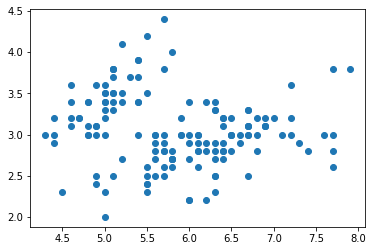

In [ ]:
# Pandas DataFrame approach
import matplotlib.pyplot as plt
plt.plot(data['sepal.length'],
         data['sepal.width'],
         ls='', marker='o')

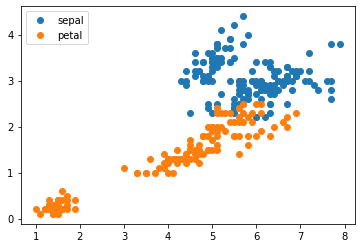

In [ ]:
# First plot statement
plt.plot(data['sepal.length'],
         data['sepal.width'],
         ls='', marker='o',
         label='sepal')

# Second plot statement
plt.plot(data['petal.length'],
         data['petal.width'],
         ls='', marker='o',
         label='petal')

plt.legend()

#### **Histograms**

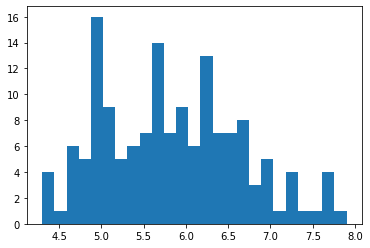

In [ ]:
# Pandas DataFrame approach
plt.hist(data['sepal.length'], bins=25)
plt.show()

#### **Customizing Plots**

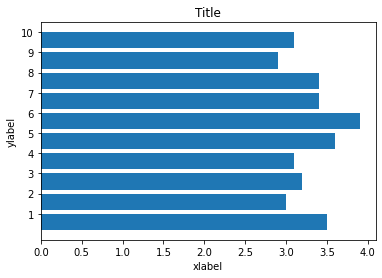

In [ ]:
import numpy as np

# matplotlib syntax
fig, ax = plt.subplots()
ax.barh(np.arange(10),
        data['sepal.width'].iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4, 10.4, 1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

plt.show()

#### **Customizing Plots: by Groups**

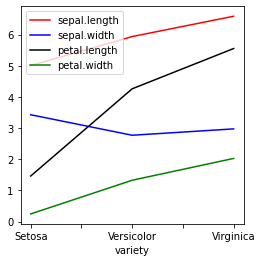

In [ ]:
# Pandas DataFrame approach
data.groupby('variety').mean().plot(color=['red', 'blue', 'black', 'green'],
                                    fontsize=10.0, figsize=(4,4))

#### **Pair Plots for Features**

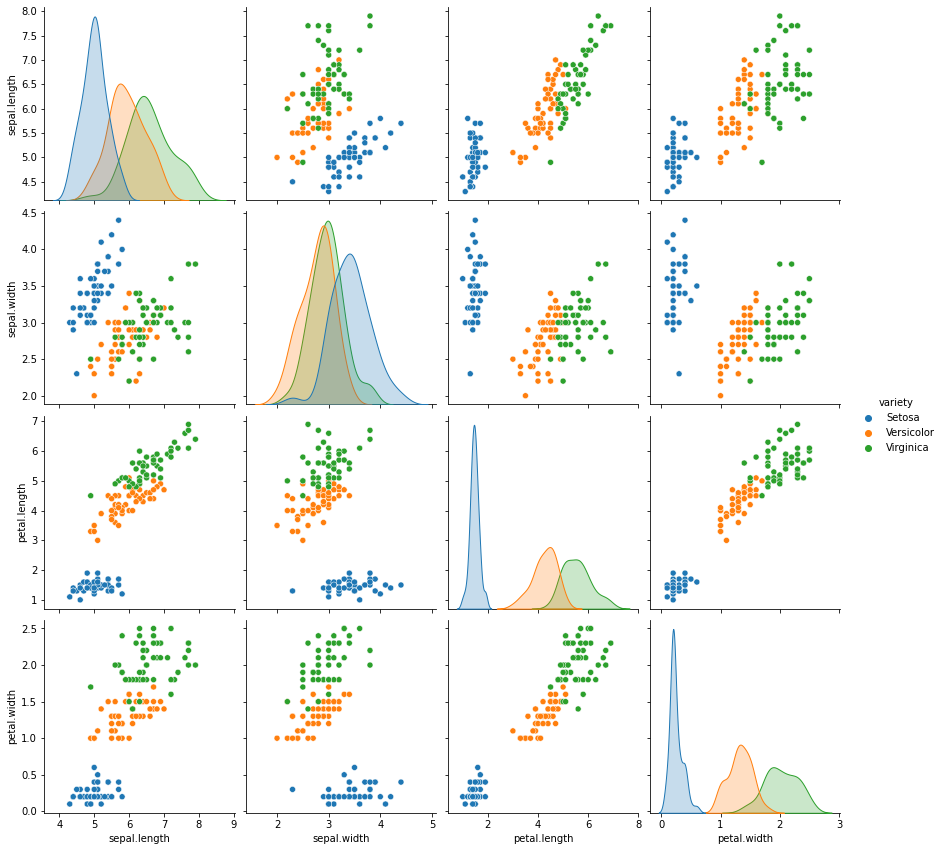

In [ ]:
import seaborn as sns

# Seaborn plot, feature correlations
sns.pairplot(data, hue='variety', height=3)

#### **Seaborn Example: Hexbin Plot**

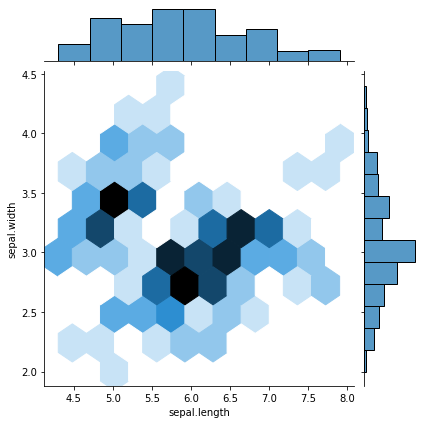

In [ ]:
# Seaborn hexbin plot
sns.jointplot(x=data['sepal.length'],
              y=data['sepal.width'],
              kind='hex')

#### **Seaborn Example: Facet Grid**

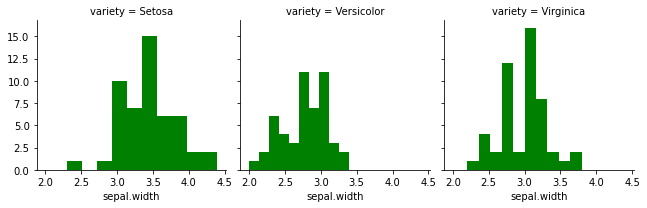

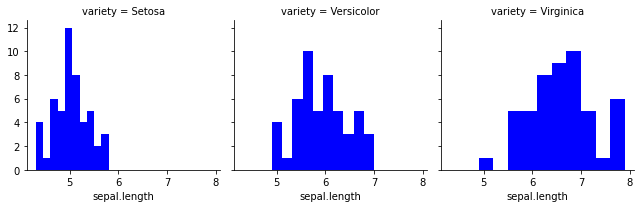

In [ ]:
# Seaborn plot, Facet Grid
# First plot statement
plot = sns.FacetGrid(data, col='variety', margin_titles = True)
plot.map(plt.hist, 'sepal.width', color='green')

# Second plot statement
plot = sns.FacetGrid(data, col='variety', margin_titles = True)
plot.map(plt.hist, 'sepal.length', color='blue')

## **ACTIVITY**
***

### **Lab**

**Introduction**

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements.

In [ ]:
import os
import numpy as np
import pandas as pd

* **Question 1**

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [ ]:
filepath = 'https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/01%20-%20Exploratory%20Data%20Analysis%20for%20Machine%20Learning/Data/iris.csv'
data = pd.read_csv(filepath)

# Adding the "Iris-" to the target values so that the Q2 can be done
data['variety'] = data.variety.apply(lambda c: c.replace(c,'Iris-'+c))
# Changing the column name to species
data.rename(columns={'variety':'species'}, inplace=True)
data.head()

sepal.length  sepal.width  petal.length  petal.width      species
0           5.1          3.5           1.4          0.2  Iris-Setosa
1           4.9          3.0           1.4          0.2  Iris-Setosa
2           4.7          3.2           1.3          0.2  Iris-Setosa
3           4.6          3.1           1.5          0.2  Iris-Setosa
4           5.0          3.6           1.4          0.2  Iris-Setosa

In [ ]:
print('The iris data set has:')

# Number of rows
print(f'- {data.shape[0]} rows')

# Colmn names
print(f'- The following column names: {data.columns.tolist()}')

# Data types
print(f'- The following data types: \n{data.dtypes}')

The iris data set has:
- 150 rows
- The following column names: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species']
- The following data types: 
sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
species          object
dtype: object


* **Question 2**

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [ ]:
data['species'] = data['species'].str.replace('Iris-', '')
data.head()

sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

* **Question 3**

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [ ]:
# The number of each species
n_species = data['species'].value_counts()
print(f'The number of each species are:\n{n_species}')

The number of each species are:
Versicolor    50
Virginica     50
Setosa        50
Name: species, dtype: int64


In [ ]:
data.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
# The mean, median, quantiles and ranges (max-min) for each petal and sepal measurement
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%':'median'}, inplace=True)
stats_df

sepal.length  sepal.width  petal.length  petal.width
mean        5.843333     3.057333         3.758     1.199333
25%         5.100000     2.800000         1.600     0.300000
median      5.800000     3.000000         4.350     1.300000
75%         6.400000     3.300000         5.100     1.800000
range       3.600000     2.400000         5.900     2.400000

* **Question 4**

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [ ]:
# The mean of each measure
data.groupby('species').mean()

sepal.length  sepal.width  petal.length  petal.width
species                                                         
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026

In [ ]:
# The median of each measure
data.groupby('species').median()

sepal.length  sepal.width  petal.length  petal.width
species                                                         
Setosa               5.0          3.4          1.50          0.2
Versicolor           5.9          2.8          4.35          1.3
Virginica            6.5          3.0          5.55          2.0

In [ ]:
# Mean and median in one table
data.groupby('species').agg(['mean', 'median'])

sepal.length        sepal.width  ... petal.length petal.width       
                   mean median        mean  ...       median        mean median
species                                     ...                                
Setosa            5.006    5.0       3.428  ...         1.50       0.246    0.2
Versicolor        5.936    5.9       2.770  ...         4.35       1.326    1.3
Virginica         6.588    6.5       2.974  ...         5.55       2.026    2.0

[3 rows x 8 columns]

* **Question 5**

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline

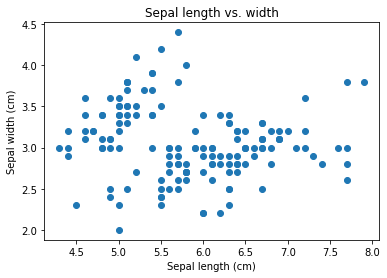

In [ ]:
# Scatter plot with matplotlib
ax = plt.axes()
ax.scatter(data['sepal.length'], data['sepal.width'])

# Label the axes
ax.set(xlabel='Sepal length (cm)',
       ylabel='Sepal width (cm)',
       title='Sepal length vs. width')

plt.show()

* **Question 6**

Make a histogram of any one of the four features. Label axes and title it as appropriate.

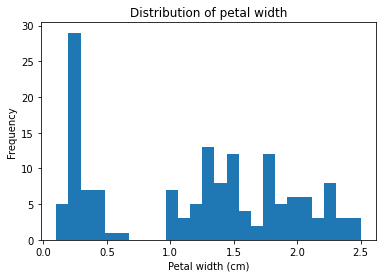

In [ ]:
ax = plt.axes()
ax.hist(data['petal.width'], bins=25)

ax.set(xlabel='Petal width (cm)',
       ylabel='Frequency',
       title='Distribution of petal width')
plt.show()

* **Question 7**

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

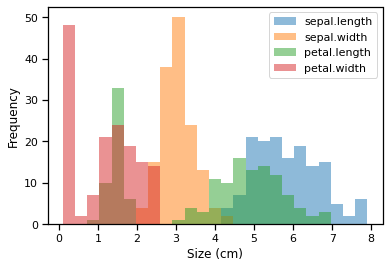

In [ ]:
import seaborn as sns
sns.set_context('notebook')

# Single plot histogram
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

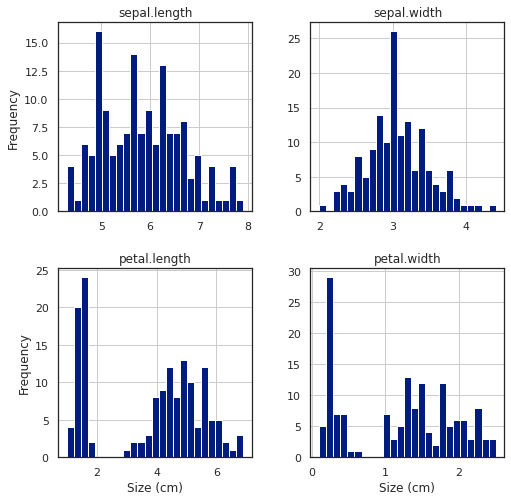

In [ ]:
# Multiple histogram plot
axList = data.hist(bins=25, figsize=(8,8))

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

* **Question 8**

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

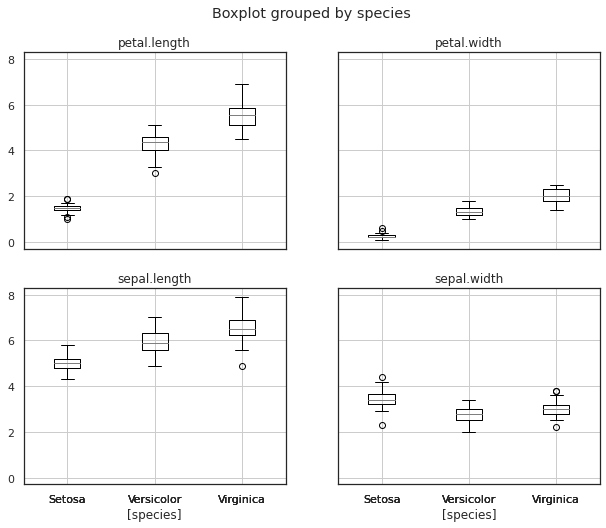

In [ ]:
# Pandas boxplot for each petal and sepal measurement
data.boxplot(by='species', figsize=(10,8));

**Question 9**

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [ ]:
# Creating the stack dataframe with one single measurement in each row
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

species   measurement  size
0  Setosa  sepal.length   5.1
1  Setosa   sepal.width   3.5
2  Setosa  petal.length   1.4
3  Setosa   petal.width   0.2
4  Setosa  sepal.length   4.9

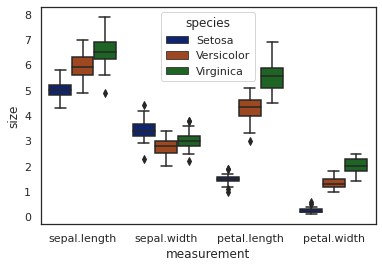

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

* **Question 10**

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

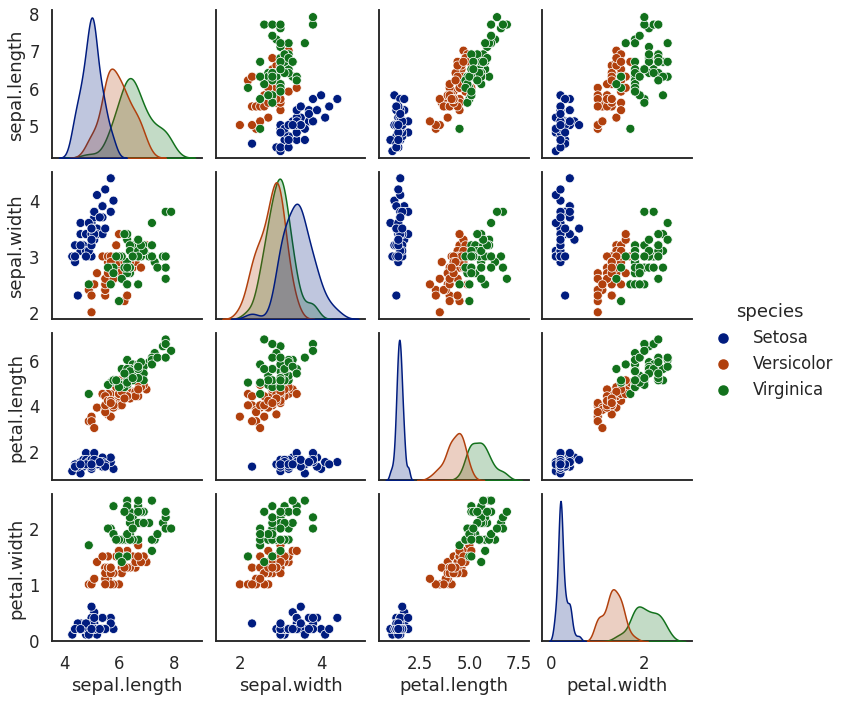

In [ ]:
sns.set_context('talk')
sns.pairplot(data, hue='species');

***
***
# **Week 1.2.4 - Feature Engineering and Variable Transformation**

Notebook of my notes for the week 1.2.4 of the course [Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).
***
***

## **TRANSFORMATION OF DATA DISTRIBUTION**

Prediction of some models (like linear regression) assume residuals are **normally distributed**.

Features and predicted data are often **skewed** (distorted away from the center).

**Data transformations** can solve this issue.

In [ ]:
# Usefull transformation functions
from numpy import log, log1p #log1p is to use log in data that has 0
from scipy.stats import boxcox

### **Transformations: Log**





```
# plot a histogram and density plot to check skewedness
sns.distplot(data, bins=20);
```



```
import math
log_data = [math.log(d) for d in data['Unemployment']]

# plot tranformed plot
sns.distplot(log_data, bins=20);
```

**Log transformations** can be useful for linear regression, since the outcomes is still a linear combination of the features.

$y _{\beta}(x)=\beta _{0}+\beta _{1}log(x)$




### **Transformations: Polynomial Features**





We can estimate higher-order relationships in the data by adding **polynomial features**.

This allows us to use the same 'linear' model.

Even with higher-order polynomial

$y _{\beta}(x)=\beta _{0}+\beta _{1}x + \beta _{2}x^{2} + \beta _{3} x^{3}$



```
# Import the class containing the transformation method
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the class (choose number of degrees)
polyFeat = PolynomialFeatures(degree=2)

# Create the polynomial feature and then transform the data
polyFeat = polyFeat.fit(X_data)
X_poly = polyFeat.transform(X_data)
```

### **Feature Encoding**

**Encoding** is often applied to **categorical features**, that take non-numeric values.

**Types of features**
* **Nominal:** categorical variables take values in unordered categories (e.g. Red, Blue, Green, True, False)
* **Ordinal:** categorical variables take values in ordered categories (e.g. High, Medium, Low)

**Approaches**
* **Binary encoding:** converts variables to either 0 or 1 and is suitable for variables that take two possible values (e.g. True or False, Male or Female, Dead or Alive)
* **One-hot encoding:** converts variables that take multiple values into binary (0, 1) variables, one for each category. This creates several new variables.
* **Ordinal encoding:** involves converting ordered categories to numerical values, usually by creating one variable that takes integer equal to the number of categories (e.g. 0, 1, 2, 3, 4, 5...)

In [ ]:
# Useful functions for encoding categorical variables
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from pandas import get_dummies

# Useful functions for encoding ordinal variables
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OrdinalEncoder

### **Feature Scaling**

**Feature scaling** involves adjusting a variable's scale.

This allows comparison of variables with different scales.

**Approaches**
* **Standard scaling:** converts features to **standard normal** variables (by subtracting the mean and dividing by the standard error).
* **Min-max scaling:** converts variables to continuous variables in the (0, 1) interval by mapping minimum values to 0 and maximum values to 1. This type of scaling is sensitive to outliers.
* **Robust scaling:** is similiar to min-max scaling, but instead maps the **interquartile range** (the 75th percentile value minus the 25th percentile value) to (0, 1). This means the variable itself takes values from outside of the (0, 1) interval.


In [ ]:
# Useful functions for scaling variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


## **ACTIVITY**

**Feature Engineering with Linear Regression: Applied to the Ames Housing Data**

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 
> 7. Getting to fancier features
> 8. Polynolmial Features in Scikit-Learn



### **1. Simple EDA**

In [ ]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
## Load in the Ames Housing Data
url = "https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/01%20-%20Exploratory%20Data%20Analysis%20for%20Machine%20Learning/Data/Ames_Housing_Data.tsv"
df = pd.read_csv(url, sep='\t')
df.shape

(2930, 82)

In [ ]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

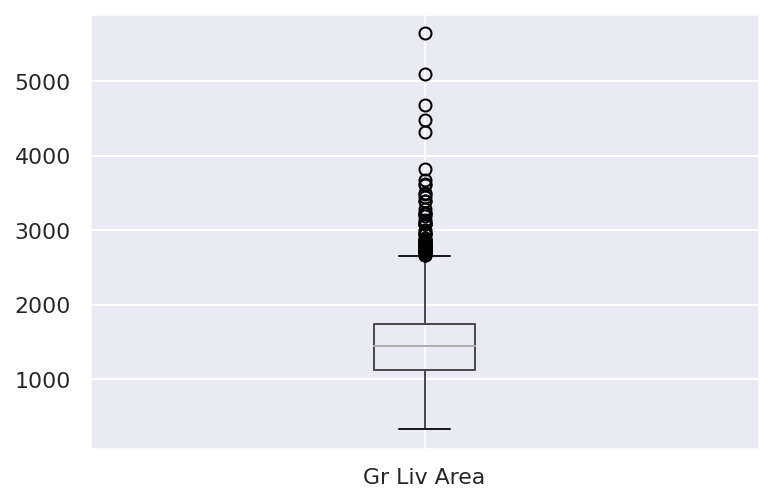

In [ ]:
df.boxplot(column='Gr Liv Area')

In [ ]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

Number of rows in the data: 2925
Number of columns in the data: 82


In [ ]:
# A quick look at the data:
df.head()

Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0      1  526301100           20  ...       WD           Normal     215000
1      2  526350040           20  ...       WD           Normal     105000
2      3  526351010           20  ...       WD           Normal     172000
3      4  526353030           20  ...       WD           Normal     244000
4      5  527105010           60  ...       WD           Normal     189900

[5 rows x 82 columns]

In [ ]:
len(df.PID.unique())

2925

In [ ]:
len(df.Order.unique())

2925

In [ ]:
# Dropping columns for which every value is unique
# Will not add any value to our eventual model
df.drop(['PID', 'Order'], axis=1, inplace=True)

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric



### **2. One-hot encoding variables:**

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

0        1        2        3        4
MS Zoning            RL       RH       RL       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      Reg      IR1      Reg      IR1
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Inside   Corner   Corner   Inside
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1        Norm    Feedr     Norm     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   2Story
Roof Style          Hip    Gable      Hip      Hip    Gable
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd    Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type      Stone     None  BrkFace     None     None
Exter Qual           TA       TA       TA       Gd       TA
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual            TA       TA       TA       TA       Gd
Bsmt Cond            Gd       TA       TA       TA       TA
Bsmt Exposure        Gd       No       No       No       No
BsmtFin Type 1      BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin Type 2      Unf      LwQ      Unf      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       TA       TA       Ex       Gd
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       Gd       Ex       TA
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd      NaN      NaN       TA       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Unf      Unf      Fin      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        Y        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN    MnPrv      NaN      NaN    MnPrv
Misc Feature        NaN      NaN     Gar2      NaN      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

In [ ]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

count          mean  ...          75%           max
Order                   2925.0  1.464795e+03  ...       2199.0  2.930000e+03
PID                     2925.0  7.143931e+08  ...  907180130.0  1.007100e+09
MS SubClass             2925.0  5.739658e+01  ...         70.0  1.900000e+02
Lot Frontage            2435.0  6.902382e+01  ...         80.0  3.130000e+02
Lot Area                2925.0  1.010358e+04  ...      11515.0  2.152450e+05
...                        ...           ...  ...          ...           ...
Sale Condition_AdjLand  2925.0  4.102564e-03  ...          0.0  1.000000e+00
Sale Condition_Alloca   2925.0  8.205128e-03  ...          0.0  1.000000e+00
Sale Condition_Family   2925.0  1.572650e-02  ...          0.0  1.000000e+00
Sale Condition_Normal   2925.0  8.246154e-01  ...          1.0  1.000000e+00
Sale Condition_Partial  2925.0  8.273504e-02  ...          0.0  1.000000e+00

[262 rows x 8 columns]

### **3. Log transforming for skewed variables**

In [ ]:
# # Create a list of float colums to check for skewing
# mask = data.dtypes == np.float
# float_cols = data.columns[mask]

# skew_limit = 0.75 # define a limit above which we will log transform
# skew_vals = data[float_cols].skew()

In [ ]:
# Create a list of float colums to check for skewing
num_cols = df.select_dtypes('number').columns

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[num_cols].skew()

In [ ]:
skew_vals

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
Misc Val         22.225015
Pool Area        18.743766
Lot Area         13.200004
Low Qual Fin SF  12.107629
3Ssn Porch       11.393854
Kitchen AbvGr     4.309573
BsmtFin SF 2      4.135900
Enclosed Porch    4.010586
Bsmt Half Bath    3.965970
Screen Porch      3.953495
Mas Vnr Area      2.565458
Open Porch SF     2.495162
Wood Deck SF      1.848286
SalePrice         1.591072
MS SubClass       1.356549
Lot Frontage      1.111071
1st Flr SF        0.942615
Bsmt Unf SF       0.925021
Gr Liv Area       0.878879
2nd Flr SF        0.847517
BsmtFin SF 1      0.821985

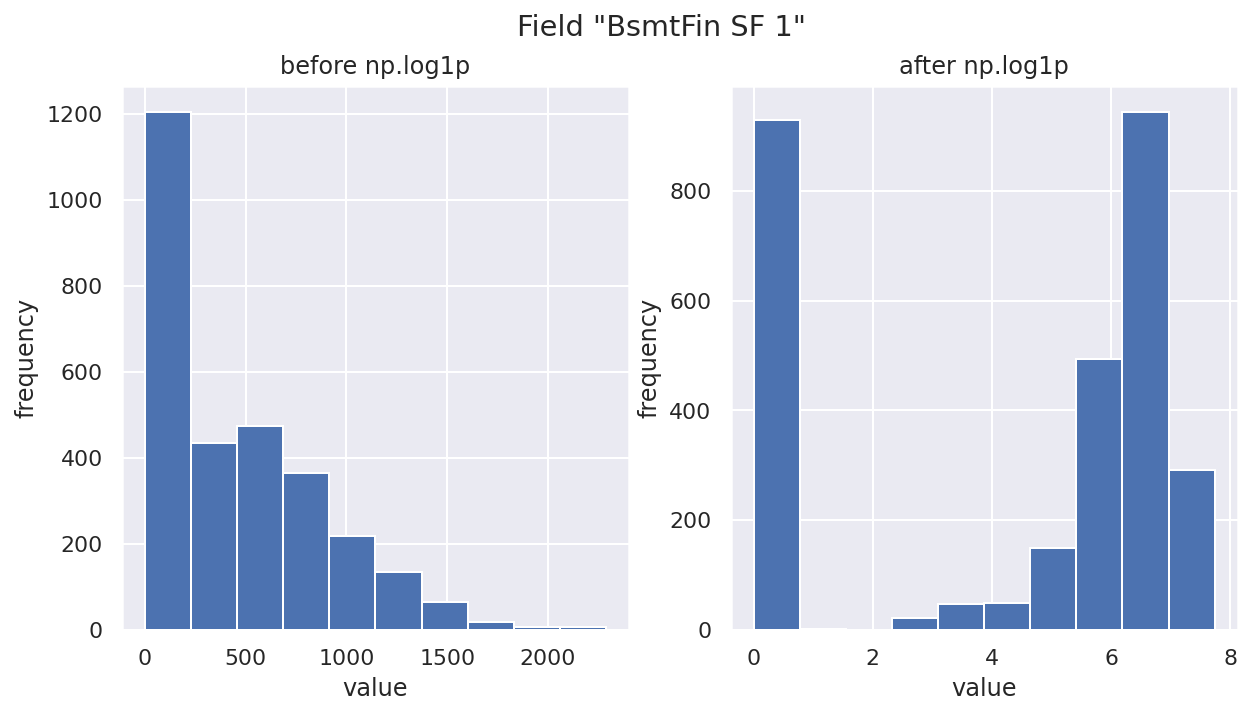

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

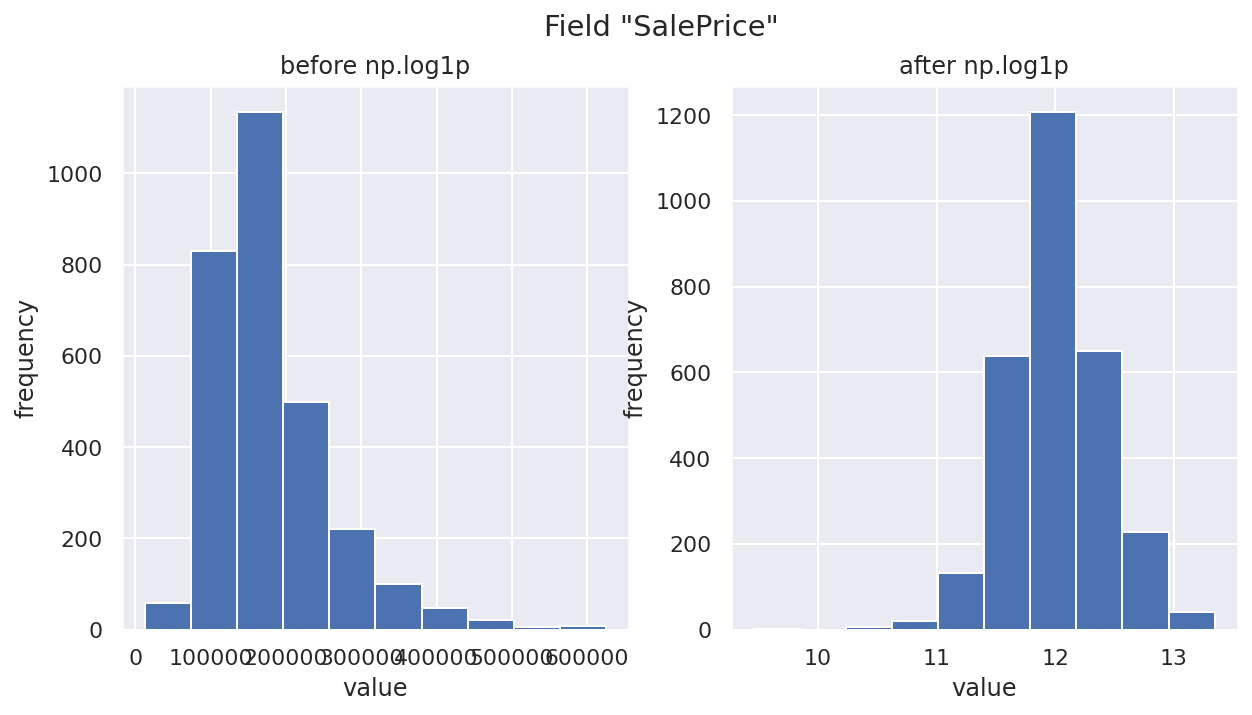

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "SalePrice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [ ]:
# We now have a larger set of potentially-useful features
df.shape

(2925, 262)

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values(ascending=False)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Fireplace Qu      1422
                  ... 
1st Flr SF           0
Central Air          0
Heating QC           0
Sale Condition       0
Order                0
Length: 82, dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [ ]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [ ]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

count           mean  ...       75%       max
Lot Area        2925.0   10103.583590  ...   11515.0  215245.0
Overall Qual    2925.0       6.088205  ...       7.0      10.0
Overall Cond    2925.0       5.563761  ...       6.0       9.0
Year Built      2925.0    1971.302906  ...    2001.0    2010.0
Year Remod/Add  2925.0    1984.234188  ...    2004.0    2010.0
Gr Liv Area     2925.0    1493.978803  ...    1740.0    3820.0
Full Bath       2925.0       1.564786  ...       2.0       4.0
Bedroom AbvGr   2925.0       2.853675  ...       3.0       8.0
Fireplaces      2925.0       0.596923  ...       1.0       4.0
Garage Cars     2925.0       1.764444  ...       2.0       5.0
SalePrice       2925.0  180411.574701  ...  213500.0  625000.0

[11 rows x 8 columns]

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [ ]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


### **4. Pair Plot Features**

Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

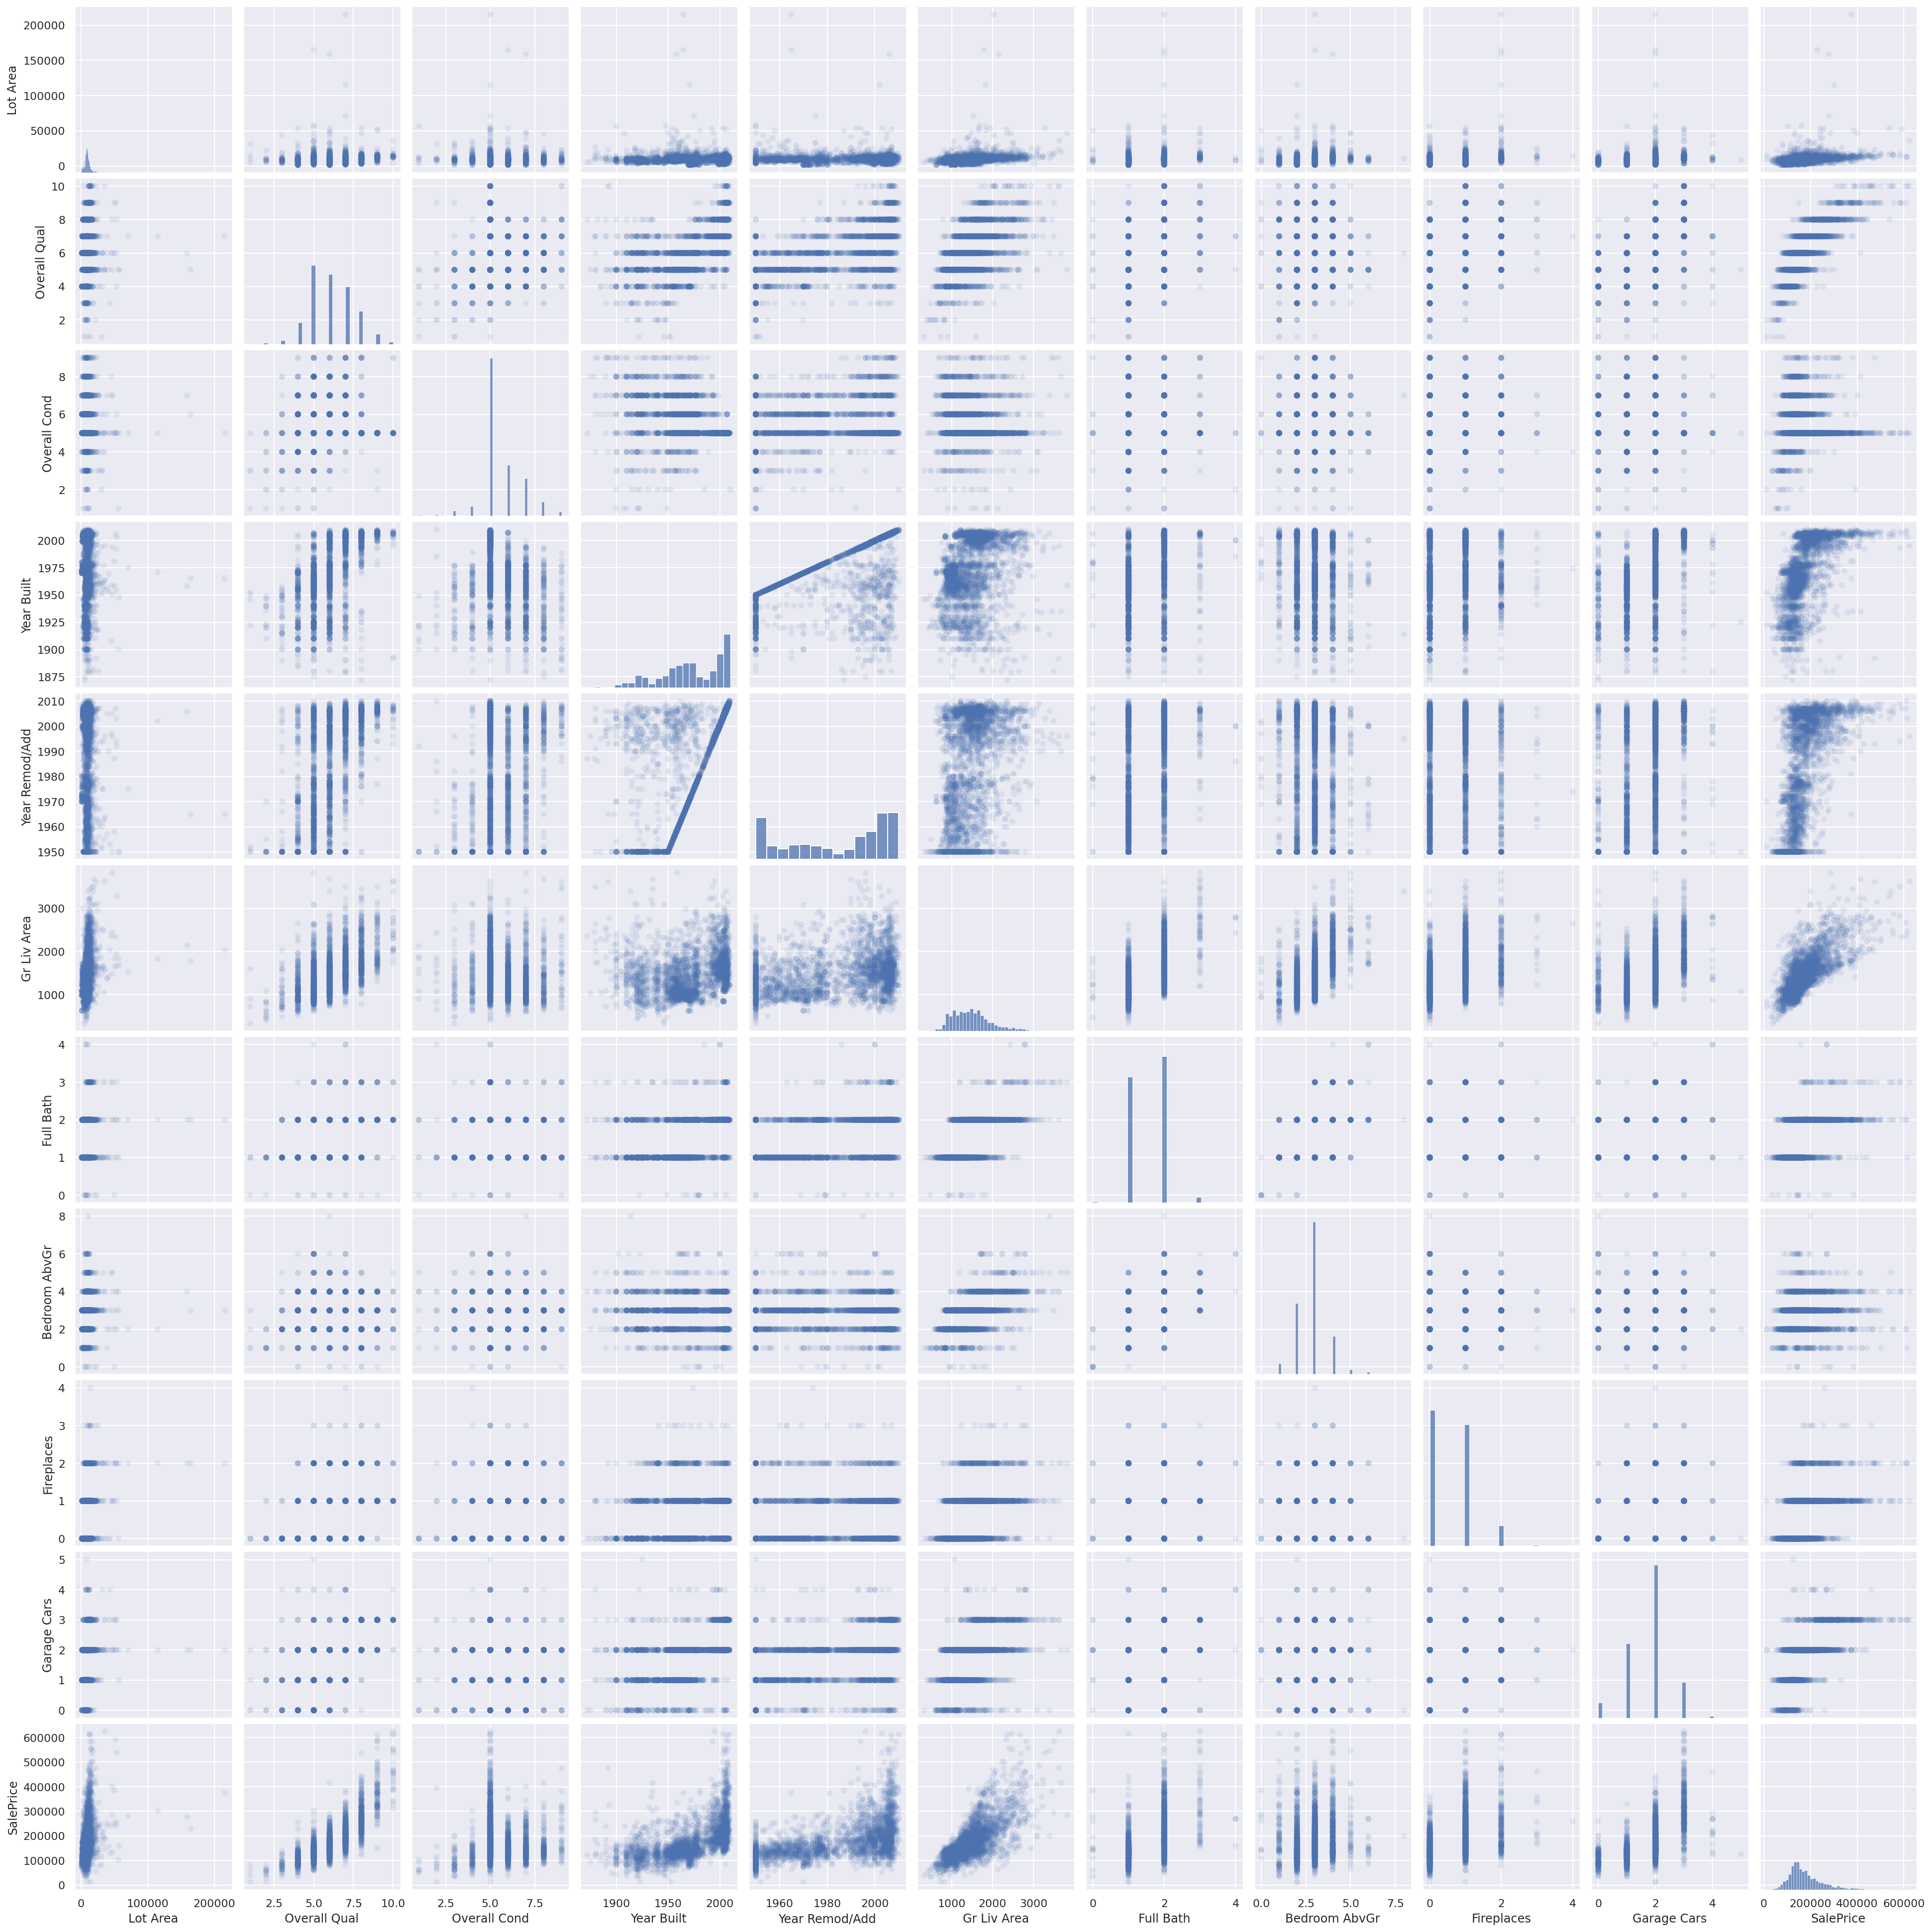

In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [ ]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward.

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

### **5. Basic feature engineering: adding polynomial and interaction terms**

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 

**Polynomial Features**

In [ ]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

**Feature Interactions**

In [ ]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----

### **6. Categories and features derived from category aggregates**

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [ ]:
data['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [ ]:
pd.get_dummies(df['House Style'], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       0       0       0       1       0     0

We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [ ]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [ ]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [ ]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

In [ ]:
X4['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64

### **7. Getting to fancier features**

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [ ]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.

In [ ]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

### **8. Polynolmial Features in Scikit-Learn**

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [ ]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
pf.get_feature_names()  #Must add input_features = features for appropriate names

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [ ]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

1  Lot Area  ...  Lot Area Overall Qual  Overall Qual^2
0     1.0   31770.0  ...               190620.0            36.0
1     1.0   11622.0  ...                58110.0            25.0
2     1.0   14267.0  ...                85602.0            36.0
3     1.0   11160.0  ...                78120.0            49.0
4     1.0   13830.0  ...                69150.0            25.0
...   ...       ...  ...                    ...             ...
2920  1.0    7937.0  ...                47622.0            36.0
2921  1.0    8885.0  ...                44425.0            25.0
2922  1.0   10441.0  ...                52205.0            25.0
2923  1.0   10010.0  ...                50050.0            25.0
2924  1.0    9627.0  ...                67389.0            49.0

[2925 rows x 6 columns]

### **Recap**

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [_Pareto principle_](https://en.wikipedia.org/wiki/Pareto_principle), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model. 

# **Credit**
---
My notes from Machine Learning Foundation (C) 2020 IBM Corporation courses